Titanic suvival prediction using decesion tree

In [17]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [18]:
# Read the train and test data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [19]:
train_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
#Cleaning train data

# "Sex" Coulumn has male/feamle as value. We can use LabelEncoder
# to convert these to int. male:1,female:0
lb = LabelEncoder()
train_df['sex'] = lb.fit_transform(train_df['sex']) 
test_df['sex'] = lb.fit_transform(test_df['sex']) 

In [22]:
train_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


You use only Pclass, Sex, Age, Sibsp (Siblings aboard), Parch (Parents/children aboard), 
and Fare to predict whether a passenger survived. 

In [23]:
# Set the target column to Survived
targets = train_df.survived

In [24]:
#Dropping unwanted columns. Also, removing the target column.
train_df = train_df.drop(['name', 'ticket', 'cabin', 'embarked','survived'], axis=1)
train_df.head()

,pclass,sex,age,sibsp,parch,fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [25]:
# Let's get the total number of missing values in both datasets.
print("*****In the train set*****")
print(train_df.isna().sum())
print("\n")
print("*****In the test set*****")
print(test_df.isna().sum())

*****In the train set*****
pclass      0
sex         0
age       177
sibsp       0
parch       0
fare        0
dtype: int64


*****In the test set*****
pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64


In [26]:
#Imputer is used to fill all the occurances of NaN with mean of that column.
im = Imputer()
predictors = im.fit_transform(train_df)

In [27]:
#Using Decision Tree Classifier
classifier=DecisionTreeClassifier()
classifier=classifier.fit(predictors,targets)

In [28]:
# lets split the train_df and do a validation
pred_train, pred_validation, tar_train, tar_validation  =   train_test_split(predictors, targets, test_size=.4)
print("Validation test....")
dt_classifier=DecisionTreeClassifier()
dt_classifier=dt_classifier.fit(pred_train,tar_train)


Validation test....


In [29]:
validations=dt_classifier.predict(pred_validation)
print("Accuracy... "+str(sklearn.metrics.accuracy_score(tar_validation, validations)))

Accuracy... 0.773109243697479


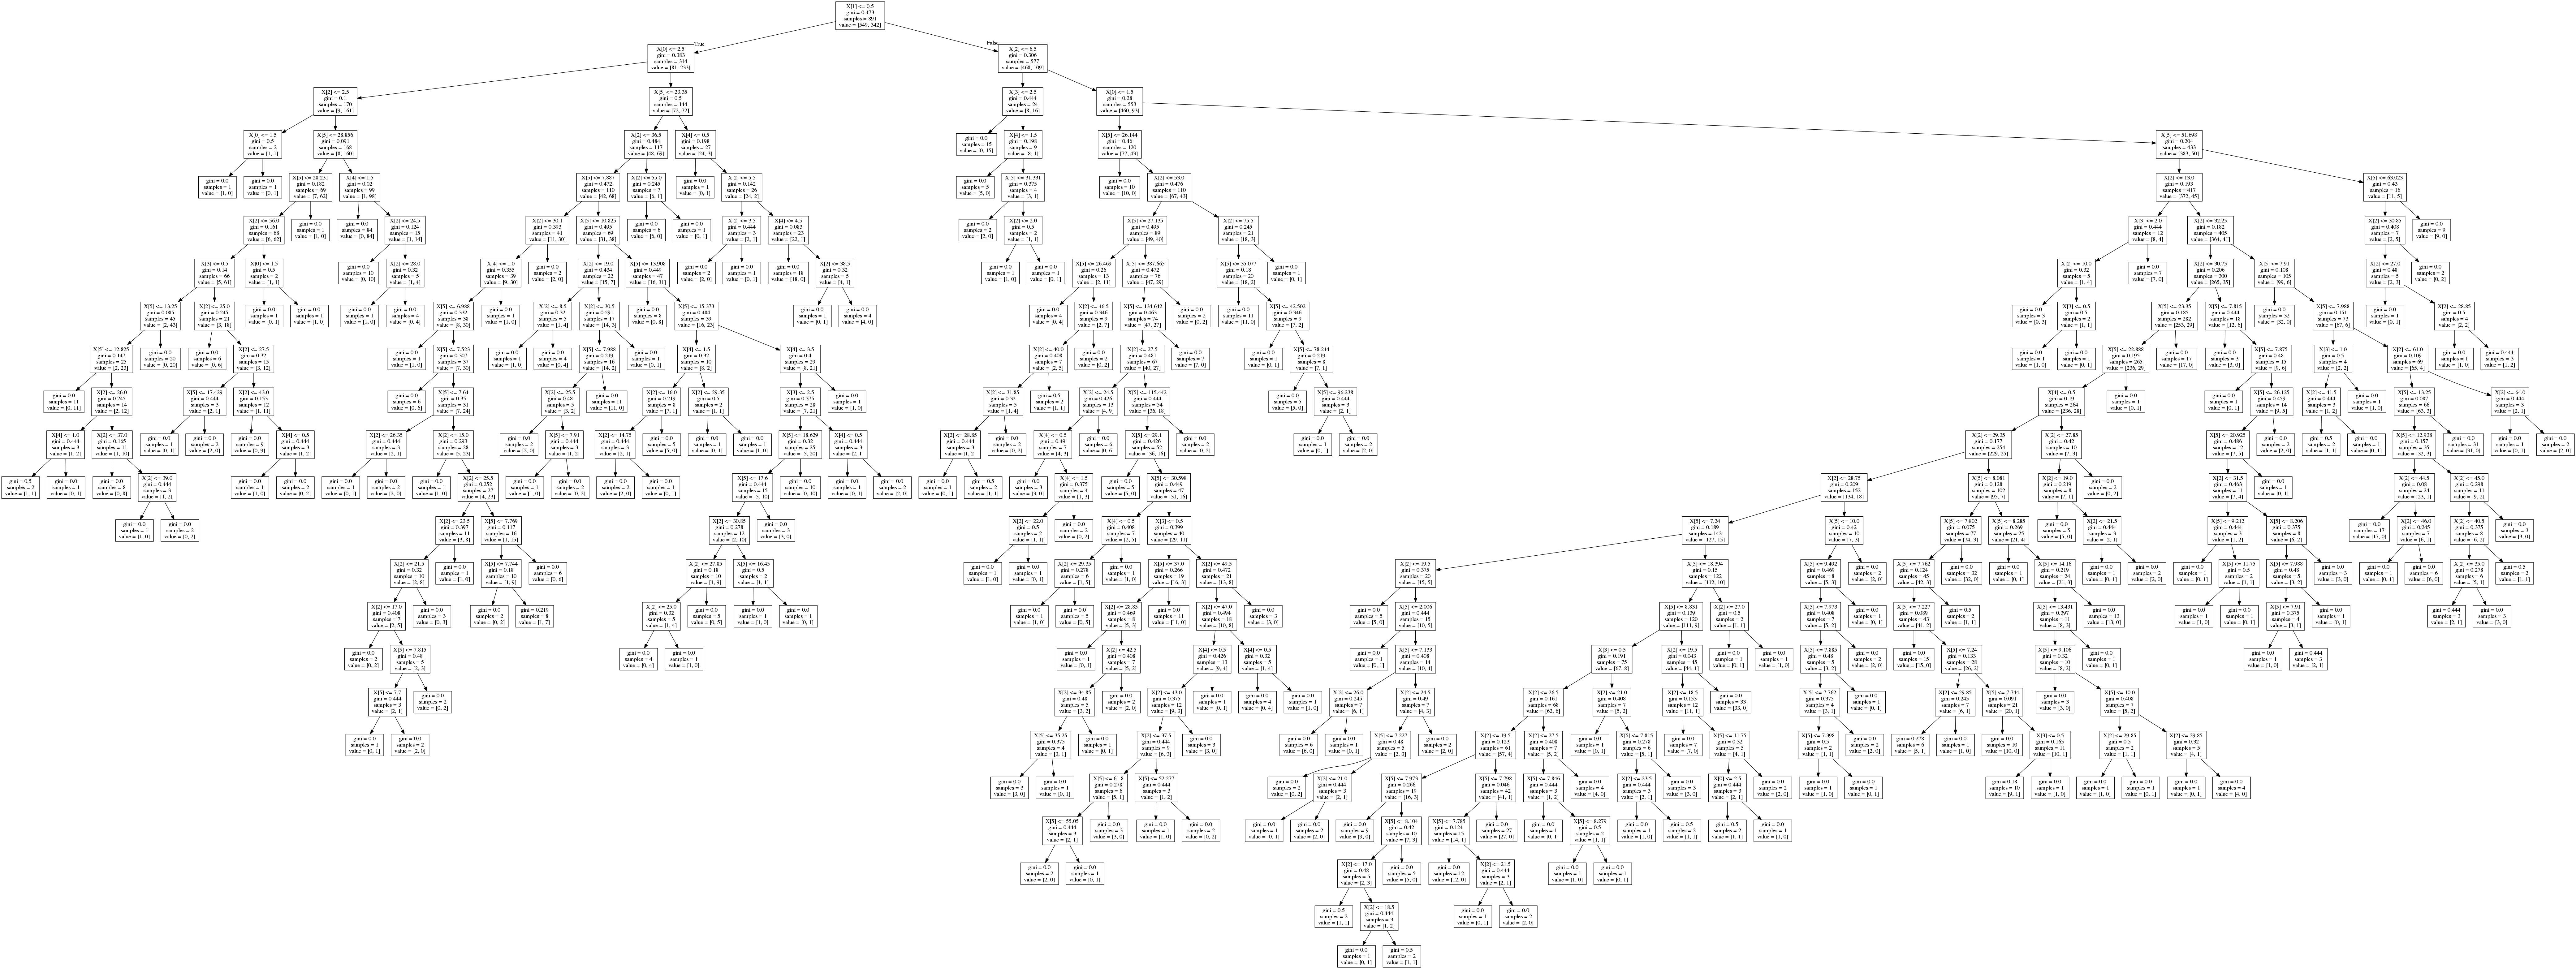

In [30]:
#Generating decision tree 
from sklearn import tree
from io import StringIO
from IPython.display import Image, display
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
display(Image(graph.create_png()))